In [3]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bank=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full (1).csv',sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.columns
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: outcome, dtype: float64

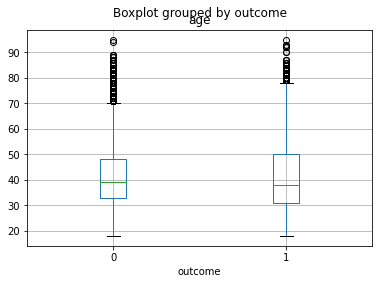

In [6]:
import matplotlib.pyplot as plt
bank.boxplot(column='age', by='outcome')
bank.groupby('job').outcome.mean()

In [7]:
job_dummies = pd.get_dummies(bank.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [8]:
bank.groupby('default').outcome.mean()

default
no     0.117961
yes    0.063804
Name: outcome, dtype: float64

In [9]:
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})

In [10]:
bank.groupby('month').outcome.mean()
bank.groupby('month').outcome.agg(['count', 'mean']).sort_values('count')

,count,mean
month,,
dec,214,0.467290
mar,477,0.519916
sep,579,0.464594
oct,738,0.437669
jan,1403,0.101212
feb,2649,0.166478
apr,2932,0.196794
nov,3970,0.101511
jun,5341,0.102228


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


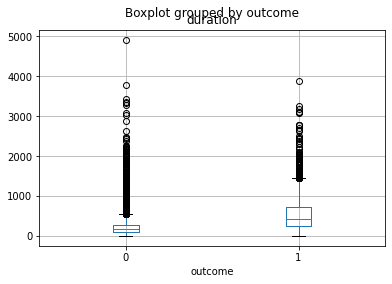

In [12]:
bank.boxplot(column='duration', by='outcome')

In [13]:
bank.groupby('previous').outcome.mean()
bank.groupby('poutcome').outcome.mean()

poutcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: outcome, dtype: float64

In [14]:
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [18]:
feature_cols = ['default', 'contact', 'previous'] + list(bank.columns[-13:])
X = bank[feature_cols]

In [19]:
y = bank.outcome
X.head()

,default,contact,previous,job_entrepreneur,job_entrepreneur,job_housemaid,job_housemaid,job_management,job_management,job_retired,job_retired,job_self-employed,job_self-employed,job_services,job_services,job_student,job_student,job_technician,job_technician,job_unemployed,job_unemployed,job_unknown,job_unknown,poutcome_other,poutcome_other,poutcome_success,poutcome_success,poutcome_unknown,poutcome_unknown
0,0,NaN,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
2,0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1


The final poutcome_success  says, the outcome 1 from the above output says that the client has subscribed a term deposit and 0 says the client not subscribed the term deposit